In [17]:
# dict of numOfPeople with date
week_dict = {
    '1': 15,
    '2': 5,
    '3': 2,
    '4': 3,
    '5': 25,
    '6': 23,
    '7': 0,
}

# dict of numOfPeople with time
time_dict = {
    # 9am
    '9.0': 0,
    '9.1': 0,
    '9.2': 5,
    '9.3': 5,
    '9.4': 5,
    '9.5': 5,
    '9.6': 10,
    '9.7': 15,
    '9.8': 8,
    '9.9': 5,

    # 10am 
    '10.0': 13,
    '10.1': 20,
    '10.2': 30,
    '10.3': 30,
    '10.4': 20,
    '10.5': 20,
    '10.6': 15,
    '10.7': 20,
    '10.8': 30,
    '10.9': 30,
    
    # 11am, peak 1
    '11.0': 40,
    '11.1': 35,
    '11.2': 40,
    '11.3': 45,
    '11.4': 55,
    '11.5': 30,
    '11.6': 20,
    '11.7': 15,
    '11.8': 10,
    '11.9': 10,
    
    # 12 am, low 
    '12.0': 8,
    '12.1': 5,
    '12.2': 7,
    '12.3': 6,
    '12.4': 10,
    '12.5': 5,
    '12.6': 7,
    '12.7': 6,
    '12.8': 8,
    '12.9': 9,
    
    # 1 pm
    '13.0': 8,
    '13.1': 5,
    '13.2': 7,
    '13.3': 6,
    '13.4': 10,
    '13.5': 5,
    '13.6': 7,
    '13.7': 6,
    '13.8': 8,
    '13.9': 9,
    
    # 2 pm
    '14.0': 10,
    '14.1': 12,
    '14.2': 5,
    '14.3': 7,
    '14.4': 10,
    '14.5': 15,
    '14.6': 20,
    '14.7': 14,
    '14.8': 8,
    '14.9': 9,
    
    # 3 pm
    '15.0': 15,
    '15.1': 17,
    '15.2': 13,
    '15.3': 18,
    '15.4': 20,
    '15.5': 25,
    '15.6': 16,
    '15.7': 14,
    '15.8': 18,
    '15.9': 20,
    
    # 4 pm
    '16.0': 25,
    '16.1': 28,
    '16.2': 20,
    '16.3': 18,
    '16.4': 25,
    '16.5': 30,
    '16.6': 40,
    '16.7': 48,
    '16.8': 42,
    '16.9': 30,
    
    # 5 pm
    '17.0': 25,
    '17.1': 20,
    '17.2': 14,
    '17.3': 8,
    '17.4': 5,
    '17.5': 5,
    '17.6': 15,
    '17.7': 20,
    '17.8': 23,
    '17.9': 35,
    
    # 6 pm
    '18.0': 40,
    '18.1': 43,
    '18.2': 50,
    '18.3': 60,
    '18.4': 65,
    '18.5': 63,
    '18.6': 52,
    '18.7': 40,
    '18.8': 31,
    '18.9': 20,
    
    # 7 pm
    '19.0': 15,
    '19.1': 13,
    '19.2': 14,
    '19.3': 10,
    '19.4': 8,
    '19.5': 7,
    '19.6': 5,
    '19.7': 3,
    '19.8': 2,
    '19.9': 2,
    
    '20.0': 0
    
    # 8 pm
#     '20.0': 8,
#     '20.1': 5,
#     '20.2': 7,
#     '20.3': 6,
#     '20.4': 10,
#     '20.5': 5,
#     '20.6': 3,
#     '20.7': 3,
#     '20.8': 2,
#     '20.9': 0
}


In [18]:
# generate data and insert into CSV 
# weekx4, 9am-8pm, interval=1min, 660 rows per day
# Assume max capability is 80 (midem size of supermarket) 

import csv
import random 

# write headers
headers = ['weekDay','timeInMin','numOfpeople', 'numOfpeopleNextmin'] 

with open('people_in_supermarket.csv','w', newline='')as my_file:
    f_csv = csv.writer(my_file)
    f_csv.writerow(headers)

# write random data 
with open('people_in_supermarket.csv','a', newline='')as my_file:
    f_csv = csv.writer(my_file)
    
    # 4 weeks 
    for week in range(1, 5):
        # Mon(1) to Sun(7)
        for week_day in range(1,8):
            # 9am (9hx60min) to 10pm (10x60min)
            NoP_prev = 0 
            for time_in_min in range(9*60,10*60):
                # generate random data, no weekday offset in the morning 
                NoP_ran_next = time_dict[str(round(time_in_min/60, 1))] + random.randrange(0, 10) 
                data_list = [week_day, time_in_min, NoP_prev, NoP_ran_next] 
                NoP_prev = NoP_ran_next
                # write list into CSV
                f_csv.writerow(data_list) 
            # 10am (10hx60min) to 8pm (20hx60min)
            NoP_prev = 0 
            for time_in_min in range(10*60,20*60):
                # generate random data
                NoP_ran_next = week_dict[str(week_day)] + time_dict[str(round(time_in_min/60, 1))] + random.randrange(0, 10) 
                data_list = [week_day, time_in_min, NoP_prev, NoP_ran_next] 
                NoP_prev = NoP_ran_next
                # write list into CSV
                f_csv.writerow(data_list)
#---------------------

540


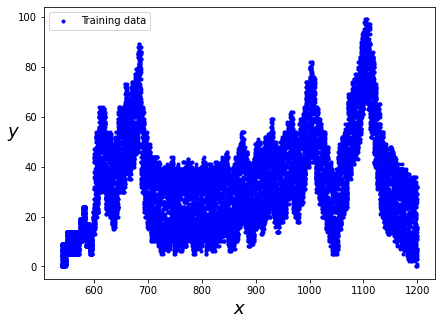

In [19]:
# illustrate data 
import pandas as pd

# Standard python libraries for data and visualisation
import matplotlib.pyplot as plt

data = pd.read_csv('./people_in_supermarket.csv')

data_MonTue = data.drop(data[data["weekDay"]>1].index)
X_MonTue = data.iloc[:, 0:-1]
y_MonTue = data['numOfpeopleNextmin']

print(X_MonTue['timeInMin'].loc[0])

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X_MonTue['timeInMin'], y_MonTue, c='b', marker='.', label="Training data")
ax.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

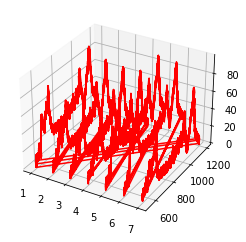

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

my_axe = plt.axes(projection='3d')

# my_axe.scatter3D(X_MonTue['timeInMin'],X_MonTue['weekDay'],y_MonTue, cmap='Blues') 
my_axe.plot3D(X_MonTue['weekDay'], X_MonTue['timeInMin'], y_MonTue, 'red') 

#ax = fig.add_subplot(111,projection='3d')

In [21]:
# split train and test set 
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

# Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Import error metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


data = pd.read_csv('./people_in_supermarket.csv')
X = data.iloc[:, 0:-1]
y = data['numOfpeopleNextmin']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

data.head()
# y_train.head()

,weekDay,timeInMin,numOfpeople,numOfpeopleNextmin
0,1,540,0,5
1,1,541,5,4
2,1,542,4,6
3,1,543,6,9
4,1,544,9,1


In [22]:
# train the model 
# poly regression 

y_preds = []
# abses_train = []
abses_test = []
max_degree = 10

min_abs_error = 100

for degree in range(1, max_degree+1):
    # Create poly feature instances with different degrees 
    poly_features = PolynomialFeatures(degree = degree) 
    # Transform training and test datasets 
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)
    
    # Create linear Regression model
    lin_reg = LinearRegression(normalize = False) 
    # fit the model 
    lin_reg.fit(x_train_poly, y_train)
    
    # Compute predictions for train and test dataset 
#     y_train_pred = lin_reg.predict(x_train_poly) 
    y_test_pred = lin_reg.predict(x_test_poly) 
#     abses_train.append(mean_squared_error(y_train, y_train_pred))
        
    abses_test_error = mean_absolute_error(y_test, y_test_pred)
    abses_test.append(abses_test_error)
    
    if abses_test_error < min_abs_error:
        min_abs_error = abses_test_error
        argmin_degree = degree

print(f"min abs error = {min_abs_error}, degree = {argmin_degree}")
print(abses_test)

min abs error = 3.5459854560369517, degree = 6
[3.698279735947304, 3.690509063046532, 3.639112288262222, 3.5998454254940144, 3.5496983724937516, 3.5459854560369517, 3.5559795688021967, 3.574262342895815, 3.6339929144179854, 3.930589966080589]


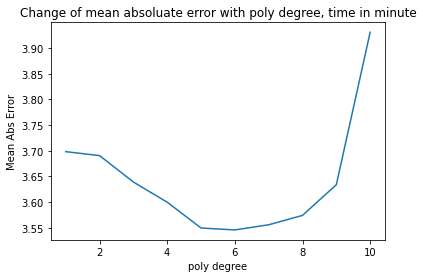

In [23]:
fig = plt.figure() 
ax = fig.add_subplot()
ax.plot(range(1, max_degree+1), abses_test)

plt.xlabel('poly degree')
plt.ylabel('Mean Abs Error')
plt.title('Change of mean absoluate error with poly degree, time in minute') 
plt.show()

In [ ]:
# Regression 
import numpy as np

y_preds = []
abses_train = []
abses_test = []

lambda_list = np.logspace(-15.0, 2.0, num = 40)

poly_features = PolynomialFeatures(degree = 11) 
# Transform training and test datasets 
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

for lambda_value in lambda_list:
    # Create Ridge Regression model for different lambda values 
    ridge_reg = Ridge(alpha = lambda_value, normalize = True)
    # Fit the model
    ridge_reg.fit(x_train_poly,y_train)

    # Compute the predictions of the model for test set
    y_reg_test_pred = ridge_reg.predict(x_test_poly)

    # Compute the Mean Absoluate Error for test set, then append the value to the lists 
    abses_test_error = mean_absolute_error(y_test, y_reg_test_pred)
    abses_test.append(abses_test_error)

# print(abses_test)

fig = plt.figure() 
ax = fig.add_subplot()
ax.plot(lambda_list, abses_test)

plt.xlabel('lambda')
plt.ylabel('Mean Abs Error')
plt.title('Change of mean absoluate error with lambda value, degree = 6') 
plt.show()
print(abses_test) 

In [24]:
# # poly regression with regression 

# import numpy as np

# y_preds = []
# abses_train = []
# abses_test = []

# lambda_list = np.logspace(-10.0, 1.0, num = 40)
# max_degree = 10

# min_abs_error = 100

# global_min_error = 100

# for degree in range(1, max_degree+1):
#     min_abs_error = 100
#     # Create poly feature instances with different degrees 
#     poly_features = PolynomialFeatures(degree = degree) 
#     # Transform training and test datasets 
#     x_train_poly = poly_features.fit_transform(x_train)
#     x_test_poly = poly_features.fit_transform(x_test)

#     for lambda_value in lambda_list:
#         # Create Ridge Regression model for different lambda values 
#         ridge_reg = Ridge(alpha = lambda_value, normalize = True)
#         # Fit the model
#         ridge_reg.fit(x_train_poly,y_train)

#         # Compute the predictions of the model for test set
#         y_reg_test_pred = ridge_reg.predict(x_test_poly)

#         # Compute the Mean Absoluate Error for test set, then append the value to the lists 
#         abses_test_error = mean_absolute_error(y_test, y_reg_test_pred)
#         abses_test.append(abses_test_error)
        
#         # update min error for one degree with different lambda
#         if abses_test_error < min_abs_error:
#             min_abs_error = abses_test_error
#             argmin_lambda = lambda_value
#     # end 2ed for 

#     print(f"degree = {degree}, min abs error = {min_abs_error}, lambda = {argmin_lambda}")
#     # update global error
#     if min_abs_error < global_min_error:
#         global_min_error = min_abs_error
#         global_degree = degree
#         global_lambda = argmin_lambda
#     # end 1st for

# print(f"global degree = {global_degree}, global min abs error = {global_min_error}, global lambda = {global_lambda}")
# print(f"list length = {len(abses_test)}, min error = {min(abses_test)}")

degree = 1, min abs error = 3.698279735964667, lambda = 1e-10
degree = 2, min abs error = 3.690509063290995, lambda = 1e-10
degree = 3, min abs error = 3.639112329458815, lambda = 1e-10
degree = 4, min abs error = 3.594692084328648, lambda = 3.4551072945922184e-08
degree = 5, min abs error = 3.5165696357553347, lambda = 1.9144819761699615e-10
degree = 6, min abs error = 3.4866808244769163, lambda = 1e-10
degree = 7, min abs error = 3.469428003618449, lambda = 1e-10
degree = 8, min abs error = 3.444180737250442, lambda = 1e-10
degree = 9, min abs error = 3.428394085953452, lambda = 1e-10
degree = 10, min abs error = 3.4149458927066725, lambda = 1e-10
global degree = 10, global min abs error = 3.4149458927066725, global lambda = 1e-10
list length = 400, min error = 3.4149458927066725


Text(0, 0.5, 'mean abs error')

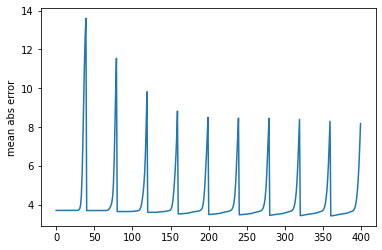

In [25]:
# x_abserror = range(len(abses_test))

# fig = plt.figure() 
# ax = fig.add_subplot()
# ax.plot(x_abserror, abses_test)

# plt.ylabel('mean abs error')

In [26]:
# import numpy as np

# y_preds = []

# lambda_list = np.logspace(-9.0, 2.0, num = 50)
# min_abs_error = 100

# for degree in range(1, max_degree+1):
#     min_abs_error = 100
#     # Create poly feature instances with different degrees 
#     poly_features = PolynomialFeatures(degree = degree) 
#     # Transform training and test datasets 
#     x_train_poly = poly_features.fit_transform(x_train)
#     x_test_poly = poly_features.fit_transform(x_test)

#     for lambda_value in lambda_list:
#         # Create Ridge Regression model for different lambda values 
#         lasso_reg = Lasso(alpha = lambda_value, normalize = True)
#         # Fit the model
#         lasso_reg.fit(x_train_poly,y_train)

#         # Compute the predictions of the model for test set
#         y_lasso_test_pred = lasso_reg.predict(x_test_poly)

#         # Compute the Mean Absoluate Error for test set, then append the value to the lists 
#         abses_test_error = mean_absolute_error(y_test, y_lasso_test_pred)
#         abses_test.append(abses_test_error)
        
#         # update min error for one degree with different lambda
#         if abses_test_error < min_abs_error:
#             min_abs_error = abses_test_error
#             argmin_lambda = lambda_value
#     # end 2ed for 

#     print(f"degree = {degree}, min abs error = {min_abs_error}, lambda = {argmin_lambda}")
#     # update global error
#     if min_abs_error < global_min_error:
#         global_min_error = min_abs_error
#         global_degree = degree
#         global_lambda = argmin_lambda
#     # end 1st for

# print(f"global degree = {global_degree}, global min abs error = {global_min_error}, global lambda = {global_lambda}")
# print(f"list length = {len(abses_test)}, min error = {min(abses_test)}")